# Problem 4.2


help from https://notebook.community/MariaRigaki/STK4030/4.1_solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import linear_model

In [2]:
vowel_train=pd.read_csv('./vowel.train.csv')
vowel_test = pd.read_csv('./vowel.test.csv')

y_train = vowel_train['y']
X_train = vowel_train.drop(['row.names', 'y'], axis=1)

y_test = vowel_test['y']
X_test = vowel_test.drop(['row.names', 'y'], axis=1)

scale_transformer = preprocessing.StandardScaler().fit(X_train)
X_trainscale = scale_transformer.transform(X_train) 
X_testscale = scale_transformer.transform(X_test)

plotting lines help from: https://github.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/blob/master/examples/Vowel.ipynb

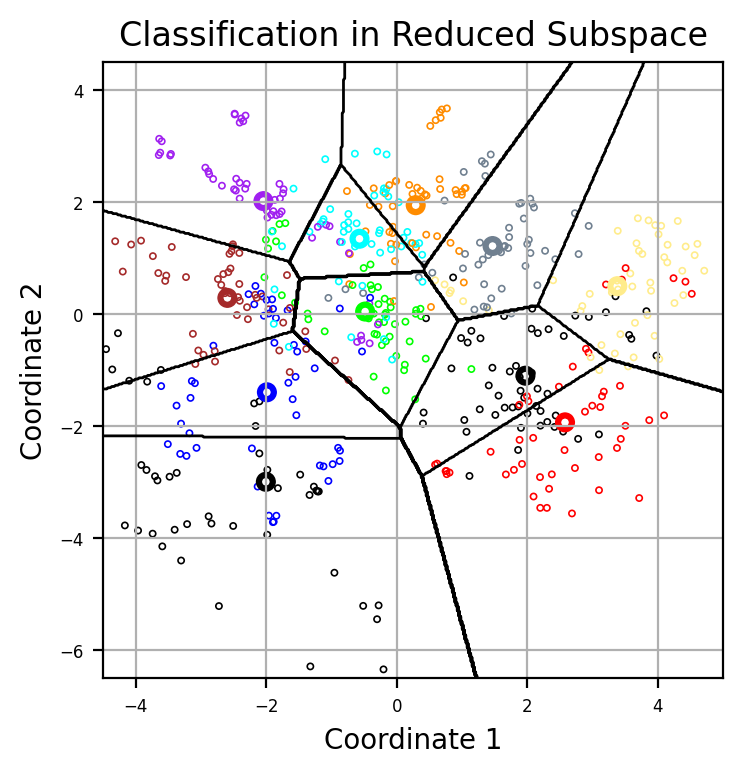

In [3]:

ldafit=LDA(n_components=2).fit(X_trainscale,y_train)

reducedX=ldafit.transform(X_trainscale)
Rlda = LDA().fit(reducedX[:, :2], y_train)
M=ldafit.transform(ldafit.means_)
grid_size = 500

X = np.transpose([np.tile(np.linspace(-4.5, 5, grid_size), grid_size),
                  np.repeat(np.linspace(-6.5, 4.5, grid_size), grid_size)])
y = Rlda.predict(X)

X0 = X[:, 0].reshape(grid_size, grid_size)
X1 = X[:, 1].reshape(grid_size, grid_size)
Y = y.reshape(grid_size, grid_size)


colors = np.array([
    '#000000', '#0000FF', '#A52A2A', '#A020F0', '#FF8C00', '#00FFFF',
    '#708090', '#FFEC8B', '#000000', '#FF0000', '#00FF00'])
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
ax.scatter(reducedX[:, 0], reducedX[:, 1], facecolors='none',
           edgecolors=colors[y_train-1], s=5, linewidth=0.6)
ax.scatter(M[:, 0], M[:, 1], facecolors='none', edgecolors=colors,
           s=5, linewidth=5)
for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(6)
plt.title('Classification in Reduced Subspace')
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
_ = ax.contour(X0, X1, Y, np.linspace(0, 9, 10)+0.5, linewidths=1,colors='black')
plt.grid()
plt.show()

In [4]:
y_pred=ldafit.predict(X_trainscale)
ldamiss = np.sum(y_pred !=y_train )
print("Classification Accuracy is:", 1- (ldamiss/ y_train.shape[0]))
print("Mislassification is:", ldamiss/y_train.shape[0])
print("Mislassified:", ldamiss, "out of 528 points")

Classification Accuracy is: 0.6837121212121212
Mislassification is: 0.3162878787878788
Mislassified: 167 out of 528 points


# Problem 5

### help from https://notebook.community/MariaRigaki/STK4030/4.1_solution

## Linear

In [5]:
vowel_train=pd.read_csv('./vowel.train.csv')
vowel_test = pd.read_csv('./vowel.test.csv')

y_train = vowel_train['y']
X_train = vowel_train.drop(['row.names', 'y'], axis=1)

y_test = vowel_test['y']
X_test = vowel_test.drop(['row.names', 'y'], axis=1)


# Indicator matrix
lb = preprocessing.LabelBinarizer()
lb.fit(y_train)
y_bin = lb.transform(y_train)
ytest_bin = lb.transform(y_test)

# Add the column of ones in the training and test data
X_train_one = np.hstack((np.ones((len(X_train), 1)), X_train))
X_test_one = np.hstack((np.ones((len(X_test), 1)), X_test))


beta_hat = np.dot(np.linalg.inv(np.dot(X_train_one.T, X_train_one)), np.dot(X_train_one.T, y_bin))
f_x = np.dot(X_train_one, beta_hat)
f_x_test = np.dot(X_test_one, beta_hat)

# Find the index with the max value and assign it to the corresponding class
g_hat = []
for row in f_x:
	index, value = max(enumerate(row), key=operator.itemgetter(1))
	g_hat.append(index + 1) # Align the class because index starts from 0

g_hat_test = []
for row in f_x_test:
	index, value = max(enumerate(row), key=operator.itemgetter(1))
	g_hat_test.append(index + 1) # Align the class because index starts from 0



In [6]:
print('Classification Accuracy training',sum((g_hat ==y_train)/ len(y_train)))
print('Classification Accuracy test', sum((g_hat_test== y_test)) / len(y_test))

Classification Accuracy training 0.5227272727272729
Classification Accuracy test 0.3333333333333333


## Logistic 

In [7]:
regr = linear_model.LogisticRegression(C=1.0)
y_pred = regr.fit(X_trainscale, y_train).predict(X_trainscale)
y_pred_test = regr.predict(X_testscale)
print('Classification Accuracy training',sum(y_pred==y_train)/len(y_train))
print('Classification Accuracy test',sum(y_pred_test==y_test)/len(y_test))


Classification Accuracy training 0.7272727272727273
Classification Accuracy test 0.45021645021645024
